In [1]:
import misc
from plots import *

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from logparser import LogReader, PosReader

# Prepare the data

In [2]:
# Load log files
logs = []

logs.append(misc.getLogDictionnary(
    "Google Pixel 7",
    "../.data/2023_Dataset_Hervanta/3_dynamic_campus/Google_Pixel7/log_GooglePixel7_20230801110405.txt",
    "mimir"
))

logs.append(misc.getLogDictionnary(
    "Google Pixel 7",
    "../.data/2023_Dataset_Hervanta/3_dynamic_campus/Google_PixelWatch/log_GooglePixelWatch_20230801110404.txt",
    "mimir"
))

logs.append(misc.getLogDictionnary(
    "Xiaomi 11T",
    "../.data/2023_Dataset_Hervanta/3_dynamic_campus/Xiaomi_11T/log_Xiaomi11T_20230801111451.txt",
    "mimir"
))

# Parse log - This might take a while...
for log in logs:
    log['content'] = LogReader(log['filepath'], ['Raw', 'Fix'], log['mode'])

In [3]:
# Set reference position
filepath = "../example_data/NMND17420010S_2023-08-01_08-24-35.pos"
ref = PosReader(filepath)

In [4]:
# Compute ENU errors
ref_enu = [61.449219, 23.856267, 166.0]
for log in logs:
    log['content'].fix[["east", "north", "up"]] = log['content'].fix.apply(
        lambda row: misc.convert2ENU(row['latitude'], row['longitude'], row['altitude'], ref_enu), 
        axis='columns', result_type='expand')
    
    log['content'].fix[["2D_error"]] = log['content'].fix.apply(
        lambda row: misc.getHorizontalError(row['east'], row['north']), 
        axis='columns', result_type='expand')
    
    log['content'].fix[["3D_error"]] = log['content'].fix.apply(
        lambda row: misc.get3DError(row['east'], row['north'], row['up']), 
        axis='columns', result_type='expand')

# Analysis

## Positions

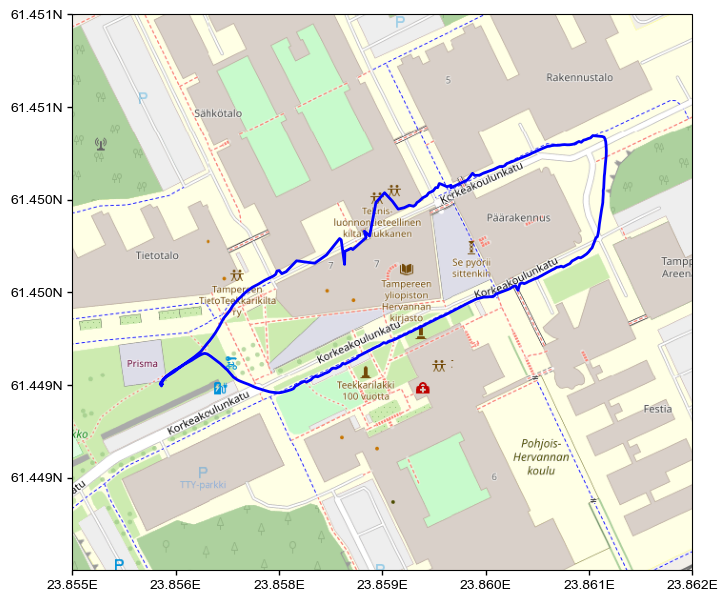

In [5]:
center = [61.449219, 23.856267]
#extent = [center[1] - 0.02, center[1] + 0.005, center[0] - 0.005, center[0] + 0.005]
extent = [center[1] - 0.001, center[1] + 0.006, center[0] - 0.001, center[0] + 0.002]

locations = []
locations.append(ref.pos)

plotMap(locations=locations, extent=extent, scale=17)

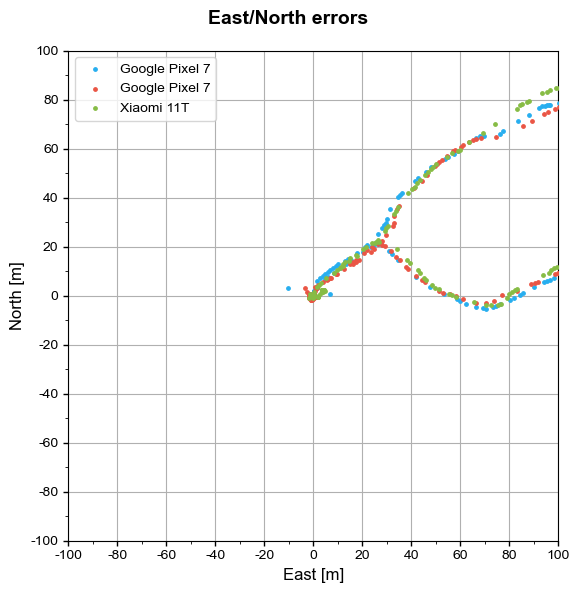

In [6]:
plotEN(logs, lim=100, ticks=[10, 20])

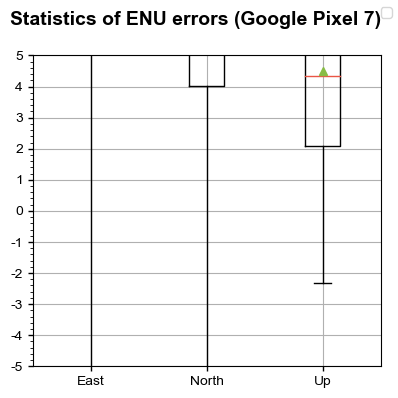

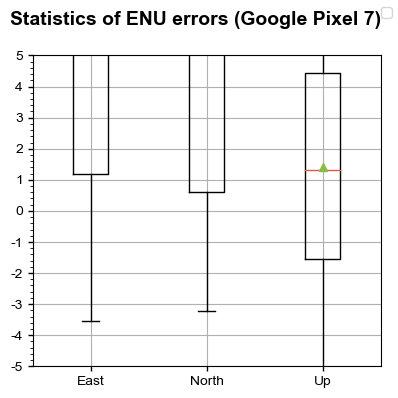

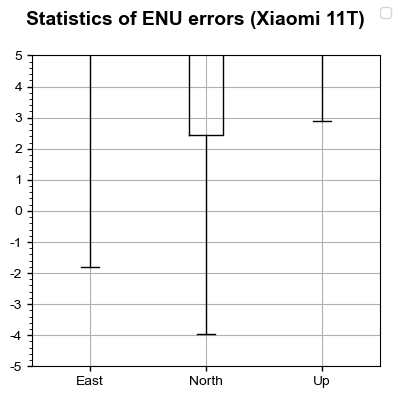

In [7]:
plotStatisticsENU(logs, mode='box')

## Measurements

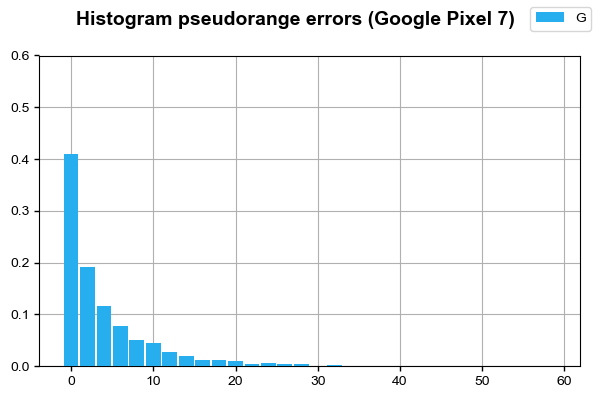

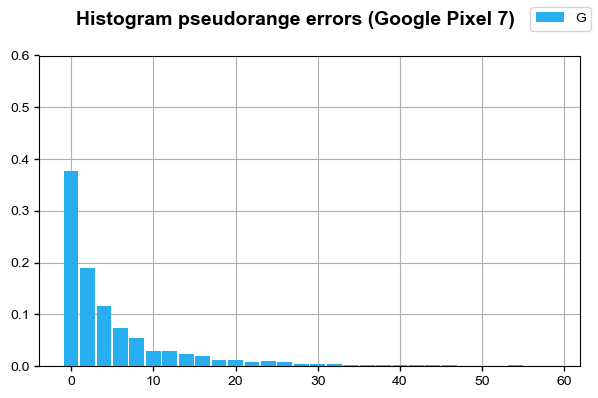

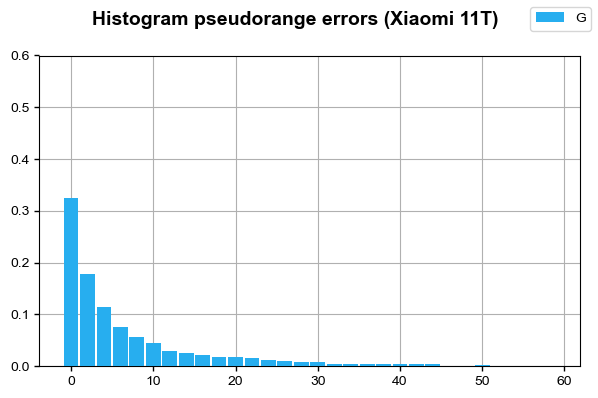

In [8]:
plotHistPerSystem(logs, ('G'), 'PseudorangeAcceleration', absolute=True)

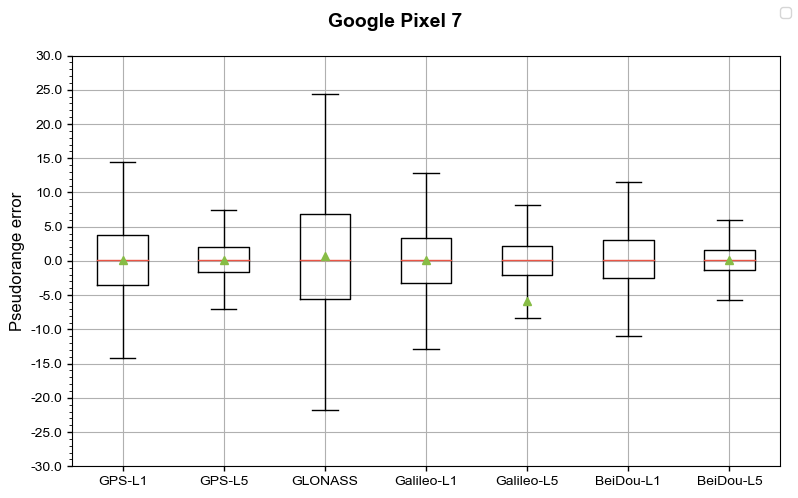

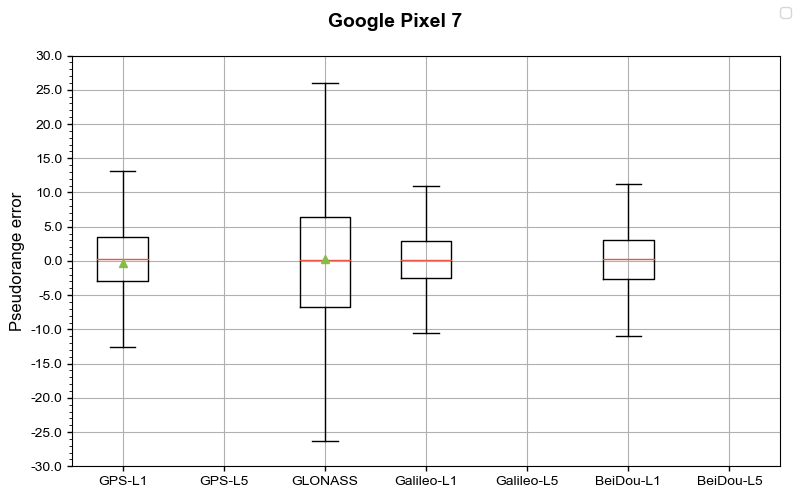

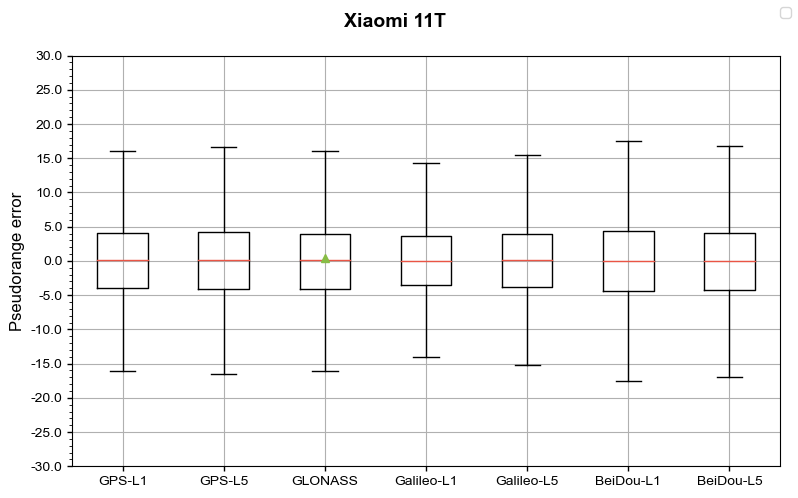

In [11]:
plotStatisticsDataBox(logs, 
                      'PseudorangeAcceleration', 
                      'Pseudorange error', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=30,
                      ticks=[1,5])